# Model Evaluation & Validation

### Project: Predicting Housing Price: Data Visualization

In [21]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
import pickle
from sklearn.cross_validation import ShuffleSplit
from sklearn.ensemble import RandomForestRegressor

# Pretty display for notebooks
%matplotlib inline

# Load housing dataset
data = pd.read_csv('DataSet_pricing_model.csv')

# Success
print ("Housing dataset has {} data points with {} variables each.".format(*data.shape))

Housing dataset has 25000 data points with 26 variables each.


In [22]:
# Feature of datatype
data.columns


Index(['id', 'type', 'locality', 'activation_date', 'latitude', 'longitude',
       'lease_type', 'gym', 'lift', 'swimming_pool', 'negotiable',
       'furnishing', 'parking', 'property_size', 'property_age', 'bathroom',
       'facing', 'cup_board', 'floor', 'total_floor', 'amenities',
       'water_supply', 'building_type', 'balconies', 'rent', 'deposit'],
      dtype='object')

In [23]:
# view datatypes of each column
data.dtypes

id                  object
type                object
locality            object
activation_date     object
latitude           float64
longitude          float64
lease_type          object
gym                  int64
lift                 int64
swimming_pool        int64
negotiable           int64
furnishing          object
parking             object
property_size        int64
property_age       float64
bathroom             int64
facing              object
cup_board          float64
floor                int64
total_floor        float64
amenities           object
water_supply        object
building_type       object
balconies          float64
rent                 int64
deposit            float64
dtype: object

In [24]:
# set target
y = data.rent

### To see corelation between features and target value,We have plotted here a corelation matrix.

#### Then we decided to keep features which are corelated to target value

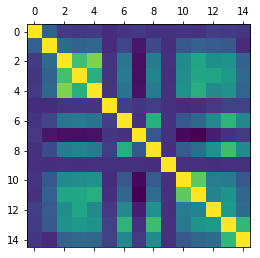

In [25]:
# Find Corelation
import matplotlib.pyplot as plt

plt.matshow(data.corr())

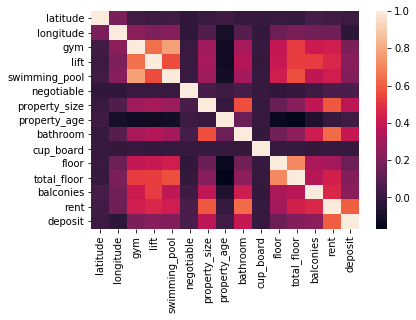

In [26]:
import seaborn as sns
corr = data.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)


### Finding low cardinality catogerical data as well as numerical data

In [27]:
# Identify categorical columns with low cardinality (a small number of distinct values)
def low_cardinality_cols(data_frame):
    low_cardinality_cols = [cname for cname in data_frame.columns if 
                                data_frame[cname].nunique() < 50 and
                                data_frame[cname].dtype == "object"]
    return(low_cardinality_cols)
  
cat_data_features =low_cardinality_cols(data)

In [28]:
# Identify numeric columns
def numeric_cols(data_frame):
    numeric_cols = [cname for cname in data_frame.columns if 
                                data_frame[cname].dtype in ['int64', 'float64']]
    return(numeric_cols)
  
  
num_data_features = numeric_cols(data)

In [29]:
data_one_hot = pd.get_dummies(data[cat_data_features + num_data_features])

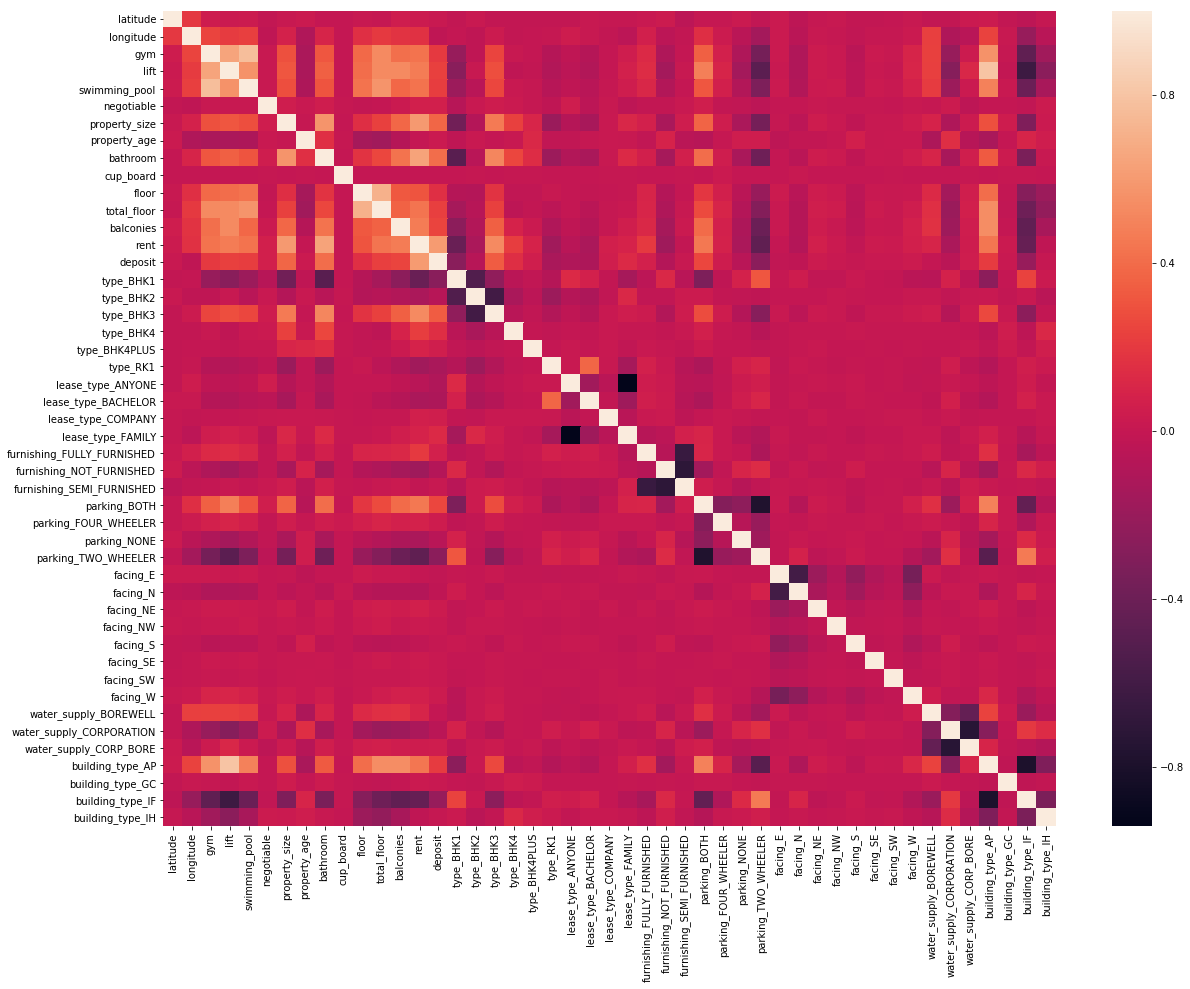

In [30]:
plt.subplots(figsize=(20,15))

corr = data_one_hot.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)



In [31]:
data.columns

Index(['id', 'type', 'locality', 'activation_date', 'latitude', 'longitude',
       'lease_type', 'gym', 'lift', 'swimming_pool', 'negotiable',
       'furnishing', 'parking', 'property_size', 'property_age', 'bathroom',
       'facing', 'cup_board', 'floor', 'total_floor', 'amenities',
       'water_supply', 'building_type', 'balconies', 'rent', 'deposit'],
      dtype='object')

In [32]:
features_cor = ['longitude', 'gym', 'lift', 'swimming_pool', 'property_size', 'bathroom', 'floor', 'total_floor', 'balconies', 'deposit']
data_new = data[features_cor]

In [33]:
y = data.rent

In [34]:
# Split into validation and training data
from sklearn.model_selection import train_test_split
train_X, val_X, train_y, val_y = train_test_split(data_new, y, test_size=0.2)

In [35]:
new_dt_model=RandomForestRegressor()

new_dt_model.fit(train_X,train_y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [36]:
val_predictions = new_dt_model.predict(val_X)

In [37]:
# print accuracy
from sklearn.metrics import mean_absolute_error
train_accuracy = new_dt_model.score(train_X, train_y)
val_accuracy = new_dt_model.score(val_X, val_y)
print('train_accuracy: ',train_accuracy)
print('val_accuracy: ',val_accuracy)

train_accuracy:  0.9708028674257242
val_accuracy:  0.8392064198190117


#### We can see our model has overfitted the training data. But, Still we have achieved accuracy of 83.2% on test data